### Name : Mehraiel Mina
### Group 2 Smart

In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
import tensorflow.keras as keras
import tensorflow as tf
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

### Show Images

170508288/170498071 [==============================] - 11s 0us/step


/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


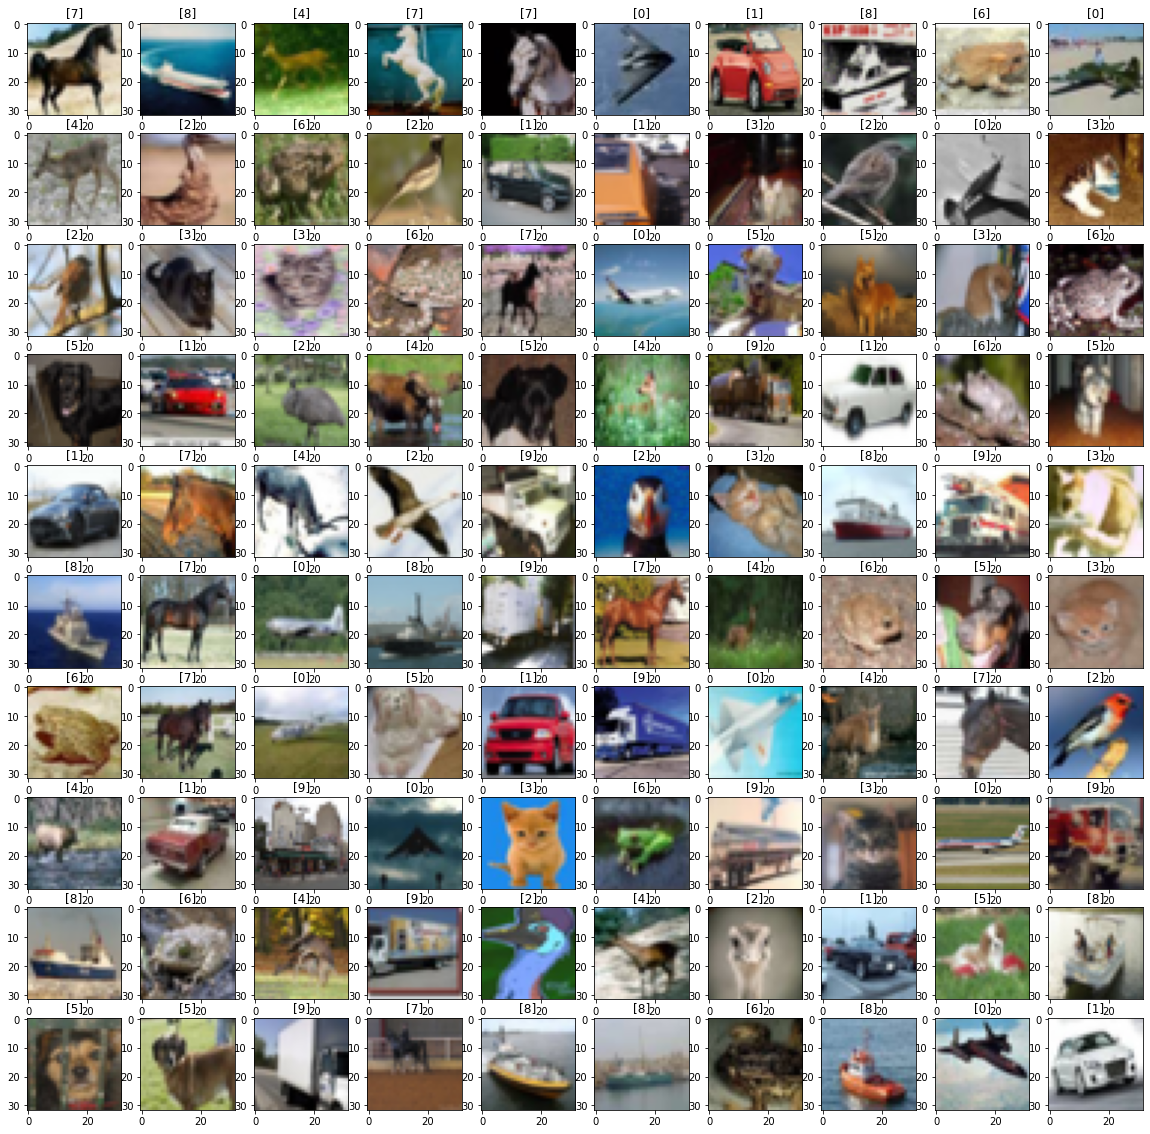

In [2]:
(train_imgs,train_labels) , (test_imgs,test_labels) = cifar10.load_data()
x_train, x_val, y_train, y_val = train_test_split(train_imgs,train_labels,test_size=100,stratify=train_labels)

fig, ax = plt.subplots(10, 10,figsize=(20, 20))
x_k = 0

for i in range(10):
    for j in range(10):
        ax[i][j].imshow(x_val[x_k], aspect='auto')
        ax[i][j].title.set_text(y_val[x_k])
        x_k += 1
 
plt.show()

### number of images per class

- Train

In [3]:
classes , counts = np. unique(train_labels, return_counts=True)
print(classes)
print(counts)

[0 1 2 3 4 5 6 7 8 9]
[5000 5000 5000 5000 5000 5000 5000 5000 5000 5000]


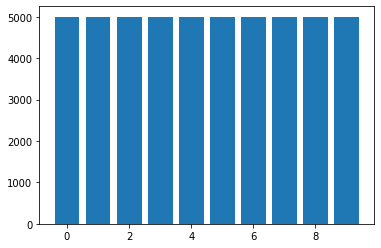

In [4]:
plt.bar(classes, counts)
plt.show()

- Test

In [5]:
classes , counts = np. unique(test_labels, return_counts=True)
print(classes)
print(counts)

[0 1 2 3 4 5 6 7 8 9]
[1000 1000 1000 1000 1000 1000 1000 1000 1000 1000]


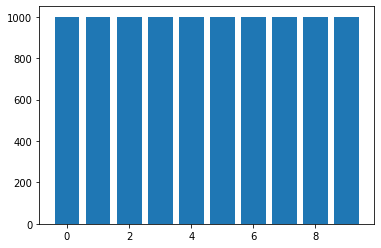

In [6]:
plt.bar(classes, counts)
plt.show()

### without validation

In [2]:
(train_imgs,train_labels) , (test_imgs,test_labels) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [3]:
train_imgs = train_imgs.astype('float32') / 255
test_imgs = test_imgs.astype('float32') / 255

In [5]:
train_labels = to_categorical(train_labels)
print(train_labels.shape)

(50000, 10)


In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [8]:
model.compile(optimizer='adam',metrics=['accuracy'],loss='categorical_crossentropy')

In [9]:
model.fit(train_imgs,train_labels,batch_size=265,epochs=15)

Epoch 1/15
189/189 [==============================] - 53s 272ms/step - loss: 1.7601 - accuracy: 0.3544
Epoch 2/15
189/189 [==============================] - 53s 279ms/step - loss: 1.3907 - accuracy: 0.4999
Epoch 3/15
189/189 [==============================] - 52s 275ms/step - loss: 1.2701 - accuracy: 0.5475
Epoch 4/15
189/189 [==============================] - 52s 274ms/step - loss: 1.1855 - accuracy: 0.5822
Epoch 5/15
189/189 [==============================] - 52s 274ms/step - loss: 1.1128 - accuracy: 0.6055
Epoch 6/15
189/189 [==============================] - 52s 274ms/step - loss: 1.0443 - accuracy: 0.6338
Epoch 7/15
189/189 [==============================] - 52s 273ms/step - loss: 0.9962 - accuracy: 0.6494
Epoch 8/15
189/189 [==============================] - 52s 274ms/step - loss: 0.9599 - accuracy: 0.6653
Epoch 9/15
189/189 [==============================] - 52s 273ms/step - loss: 0.9172 - accuracy: 0.6801
Epoch 10/15
189/189 [==============================] - 52s 273ms/step - l

### with validation

In [17]:
(train_x,train_y) , (test_imgs,test_labels) = cifar10.load_data()

In [18]:
print(train_x.shape)
print(train_y.shape)
print(test_imgs.shape)
print(test_labels.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [19]:
train_imgs, valid_imgs , train_labels , valid_labels , = train_test_split(train_x,train_y,test_size=0.2,random_state=42)

In [20]:
print(train_imgs.shape)
print(train_labels.shape)
print(valid_imgs.shape)
print(valid_labels.shape)
print(test_imgs.shape)
print(test_labels.shape)

(40000, 32, 32, 3)
(40000, 1)
(10000, 32, 32, 3)
(10000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [21]:
train_imgs = train_imgs.astype('float32') / 255

valid_imgs = valid_imgs.astype('float32') / 255

test_imgs = test_imgs.astype('float32') / 255

In [22]:
print(train_imgs.shape)
print(valid_imgs.shape)
print(test_imgs.shape)



(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [23]:
train_labels = to_categorical(train_labels)
print(train_labels.shape)

valid_labels = to_categorical(valid_labels)
print(valid_labels.shape)


(40000, 10)
(10000, 10)


In [24]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

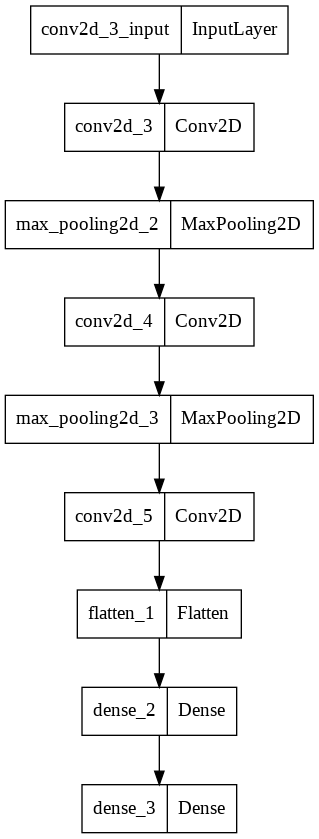

In [26]:
plot_model(model)

In [27]:
model.compile(optimizer='adam',metrics=['accuracy'],loss='categorical_crossentropy')

In [29]:
history = model.fit(train_imgs,train_labels,batch_size=265,epochs=15,validation_data=(valid_imgs,valid_labels))

Epoch 1/15
151/151 [==============================] - 50s 333ms/step - loss: 1.5943 - accuracy: 0.4232 - val_loss: 1.4572 - val_accuracy: 0.4787
Epoch 2/15
151/151 [==============================] - 45s 296ms/step - loss: 1.3911 - accuracy: 0.5003 - val_loss: 1.3099 - val_accuracy: 0.5348
Epoch 3/15
151/151 [==============================] - 45s 296ms/step - loss: 1.2949 - accuracy: 0.5408 - val_loss: 1.2653 - val_accuracy: 0.5503
Epoch 4/15
151/151 [==============================] - 43s 288ms/step - loss: 1.2039 - accuracy: 0.5744 - val_loss: 1.1836 - val_accuracy: 0.5813
Epoch 5/15
151/151 [==============================] - 43s 288ms/step - loss: 1.1445 - accuracy: 0.5976 - val_loss: 1.1312 - val_accuracy: 0.6005
Epoch 6/15
151/151 [==============================] - 44s 290ms/step - loss: 1.0715 - accuracy: 0.6247 - val_loss: 1.0806 - val_accuracy: 0.6146
Epoch 7/15
151/151 [==============================] - 45s 295ms/step - loss: 1.0291 - accuracy: 0.6390 - val_loss: 1.0361 - val_ac

In [30]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

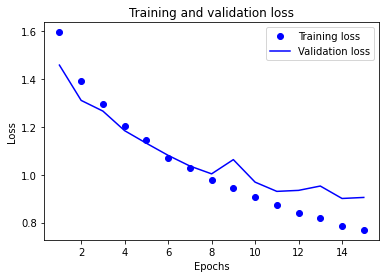

In [31]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


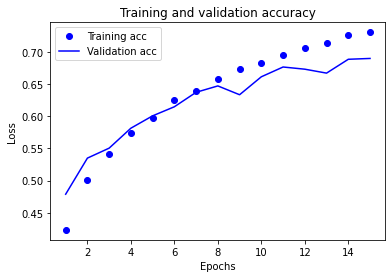

In [32]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()